In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from collections import Counter

# Load gambar

Total gambar yang di-load: 300
Shape setiap gambar (P, L, Channel Warna): (1200, 1200, 3)
Kategori: ['nantu', 'palapi', 'uru']


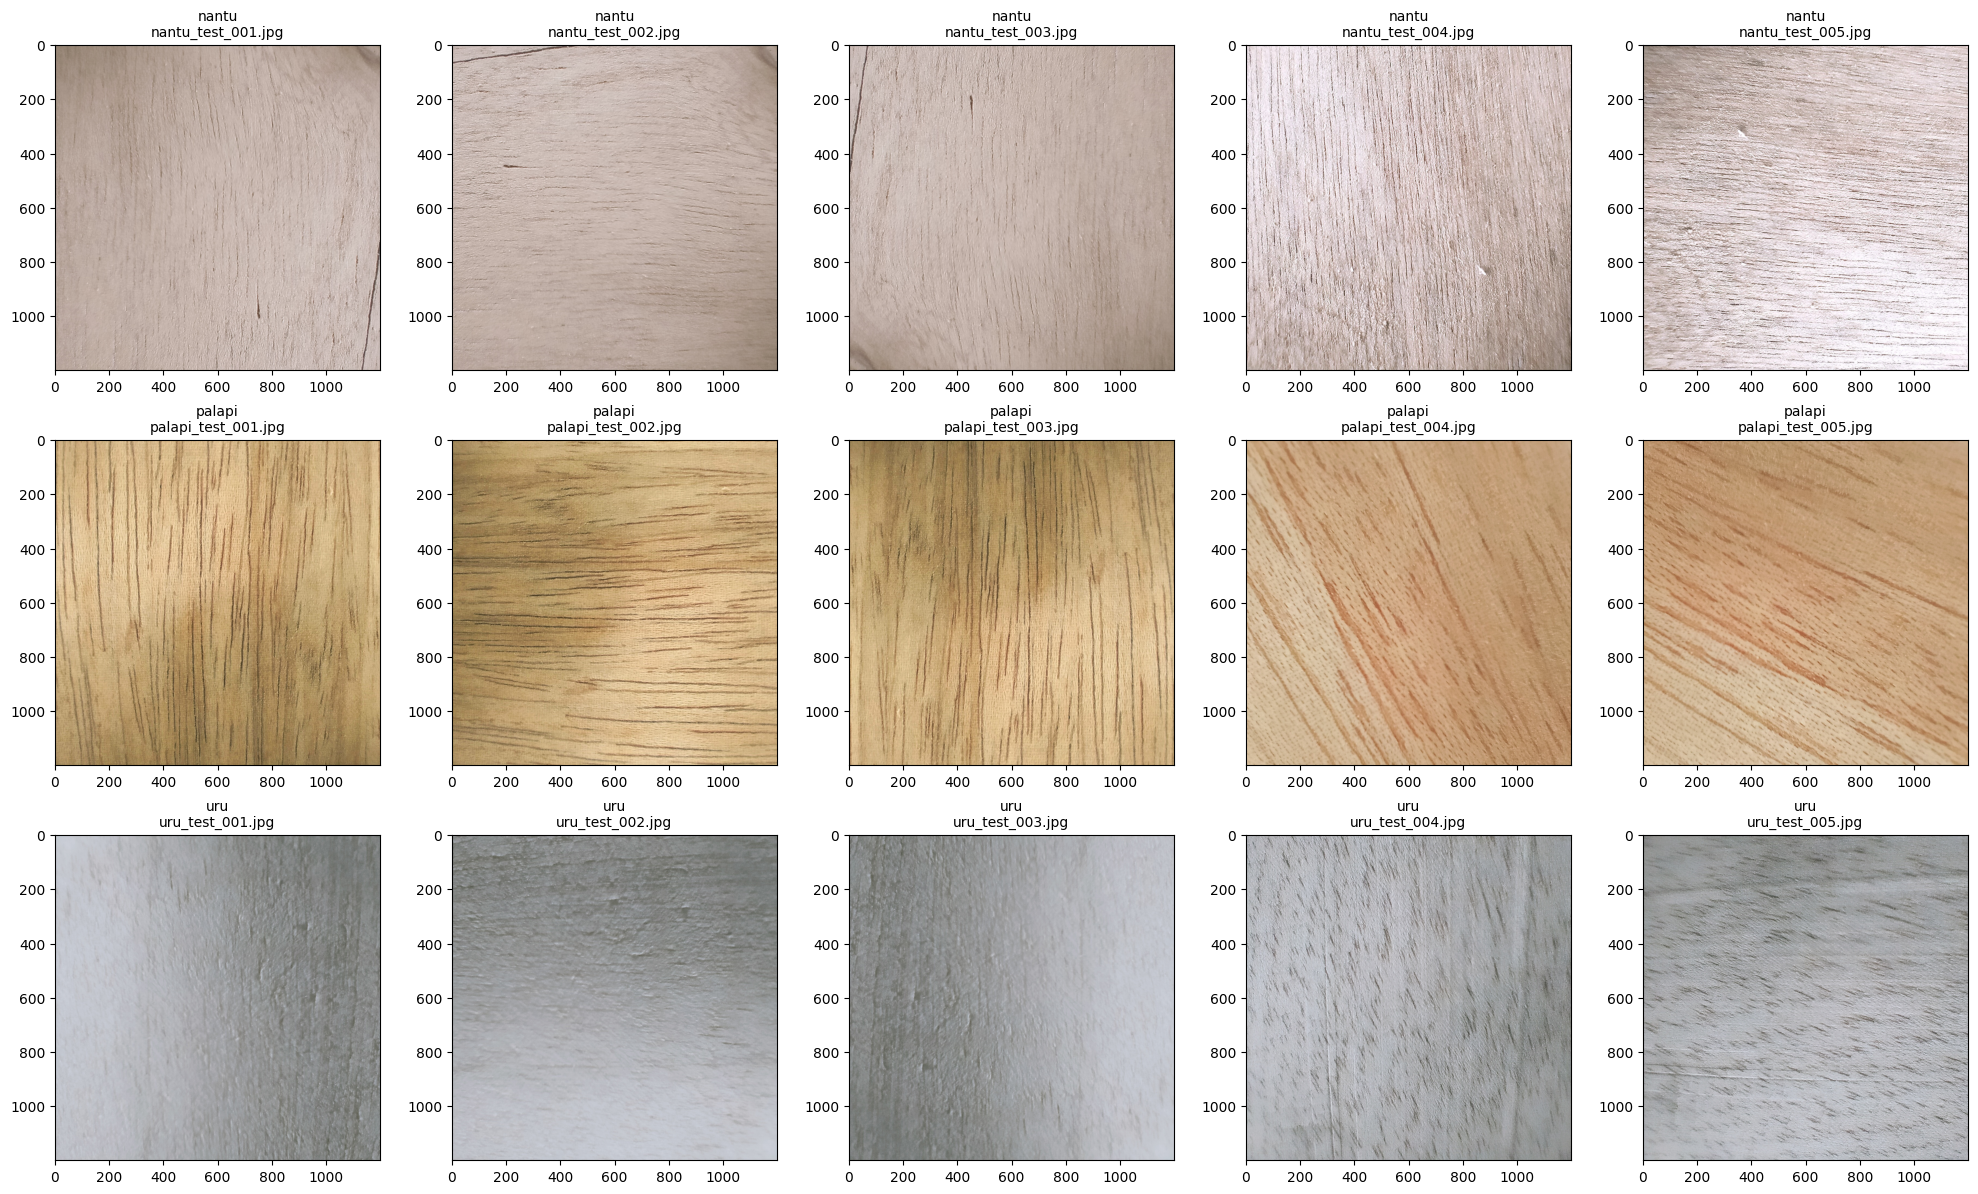

In [2]:
# Direktori dataset
dataset_path = 'serat_kayu'
categories = ['nantu', 'palapi', 'uru']

# Inisialisasi list untuk data, label, dan nama file
data = []
labels = []
file_names = []

# Loop melalui setiap kategori
for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    
    # Loop melalui setiap file dalam folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Baca gambar menggunakan OpenCV
        image = cv2.imread(file_path)
        
        # Konversi dari BGR ke RGB (karena OpenCV membaca sebagai BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Tambahkan ke list
        data.append(image_rgb)
        labels.append(label)
        file_names.append(file_name)


# Menampilkan informasi dataset
print(f"Total gambar yang di-load: {len(data)}")
print(f"Shape setiap gambar (P, L, Channel Warna): {data[0].shape}")
print(f"Kategori: {categories}")

# Menampilkan 5 sampel gambar per label
def show_samples_per_class(n_samples=5):
    plt.figure(figsize=(4 * n_samples, 4 * len(categories)))
    labels_arr = np.array(labels)
    for i, category in enumerate(categories):
        # Cari indeks untuk kelas ini
        idxs = np.where(labels_arr == i)[0][:n_samples]
        for j, idx in enumerate(idxs):
            plt.subplot(len(categories), n_samples, i * n_samples + j + 1)
            plt.imshow(data[idx])
            plt.title(f"{category}\n{file_names[idx]}", fontsize=10)

    plt.tight_layout()
    plt.show()

show_samples_per_class(n_samples=5)

# Data Understanding

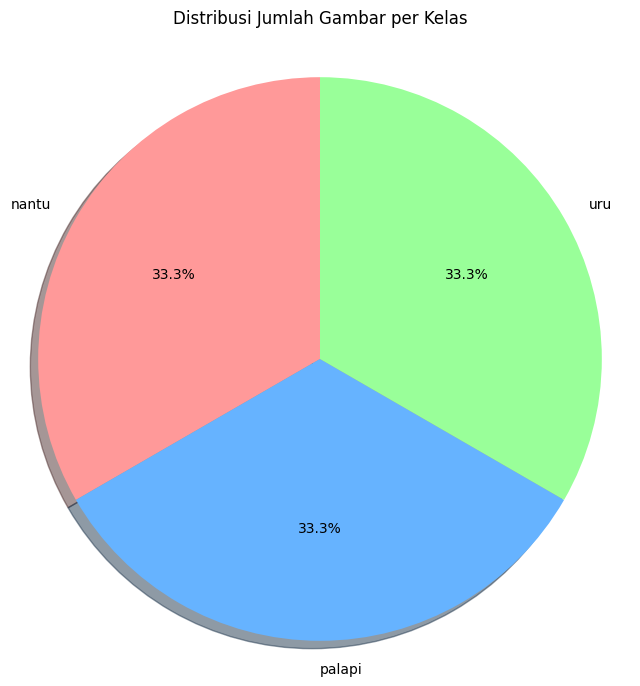


ANALISIS UKURAN GAMBAR:

NANTU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

PALAPI:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

URU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]


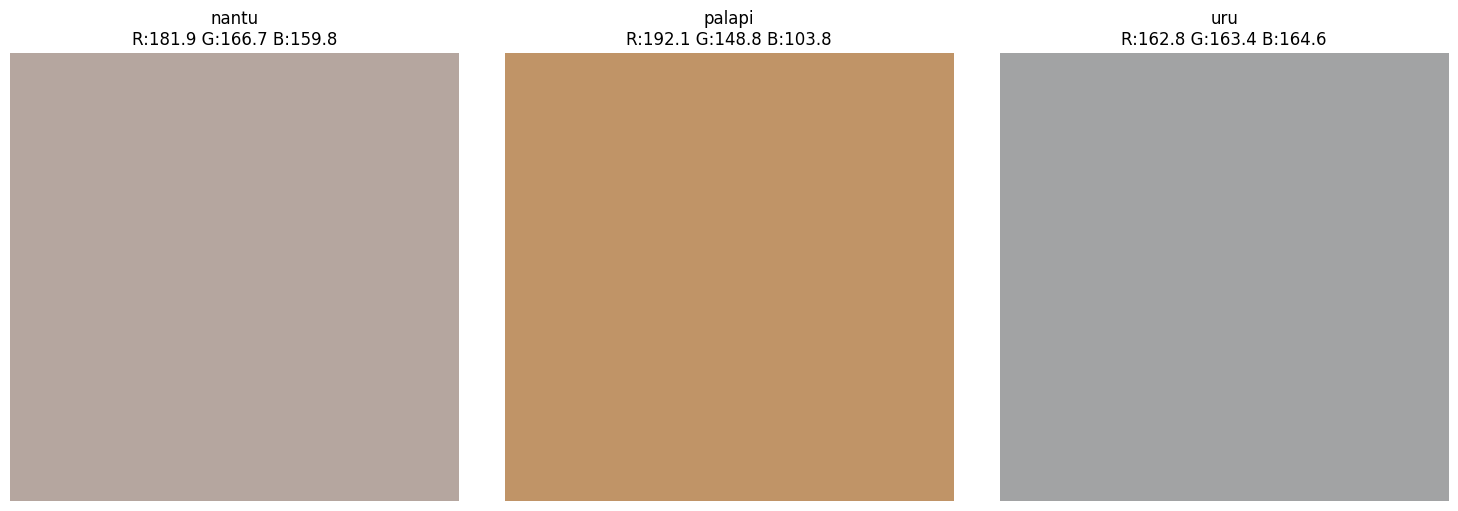

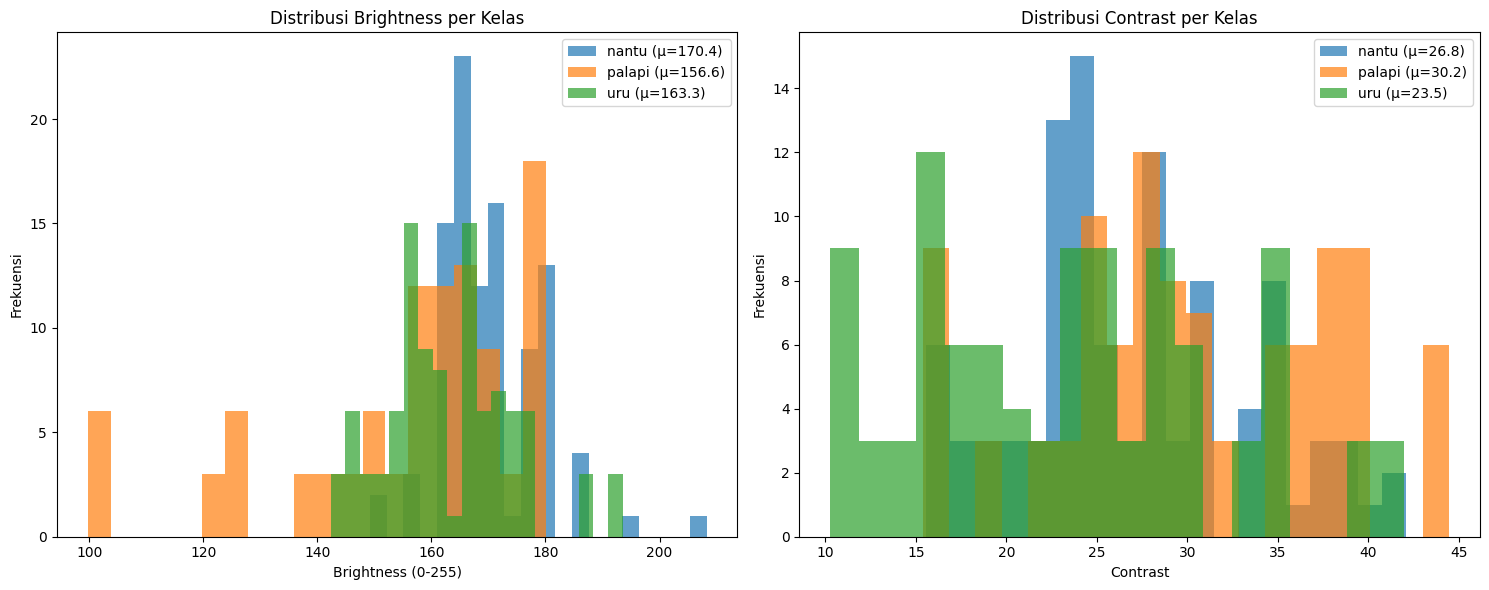

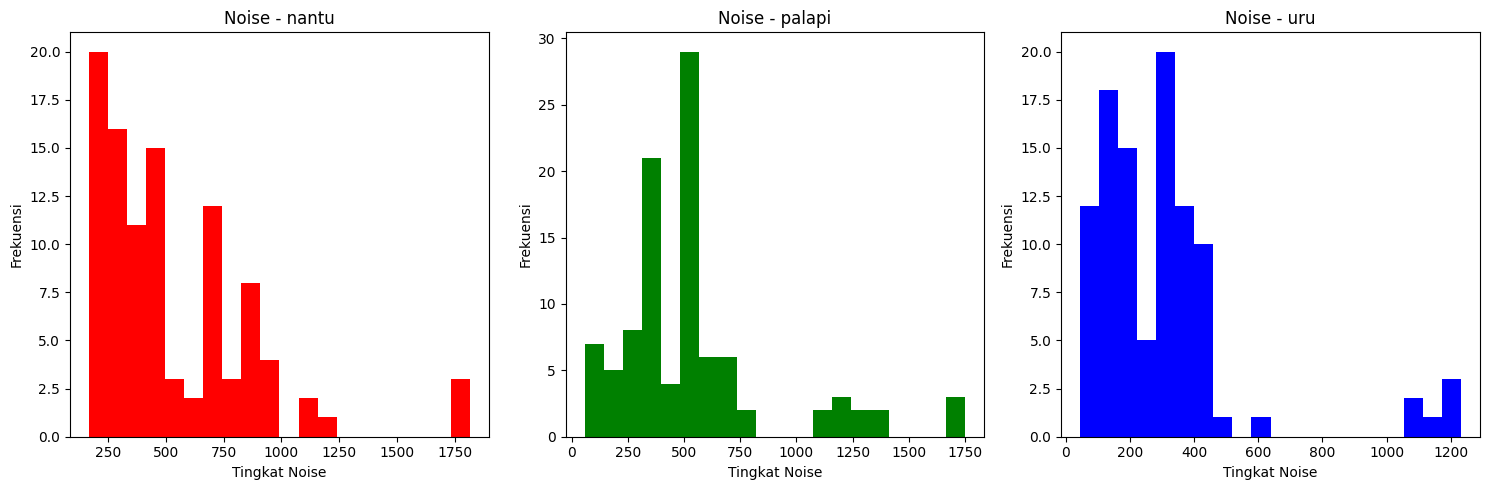


ANALISIS STATISTIK PER KELAS:

NANTU:
  Jumlah Sample: 100
  Warna Rata-rata - R:181.9 G:166.7 B:159.8
  Brightness - μ:170.4 σ:8.8
  Contrast - μ:26.8 σ:6.2
  Noise - μ:531.5 σ:338.4

PALAPI:
  Jumlah Sample: 100
  Warna Rata-rata - R:192.1 G:148.8 B:103.8
  Brightness - μ:156.6 σ:20.6
  Contrast - μ:30.2 σ:7.7
  Noise - μ:535.9 σ:356.0

URU:
  Jumlah Sample: 100
  Warna Rata-rata - R:162.8 G:163.4 B:164.6
  Brightness - μ:163.3 σ:11.4
  Contrast - μ:23.5 σ:8.3
  Noise - μ:303.5 σ:248.4


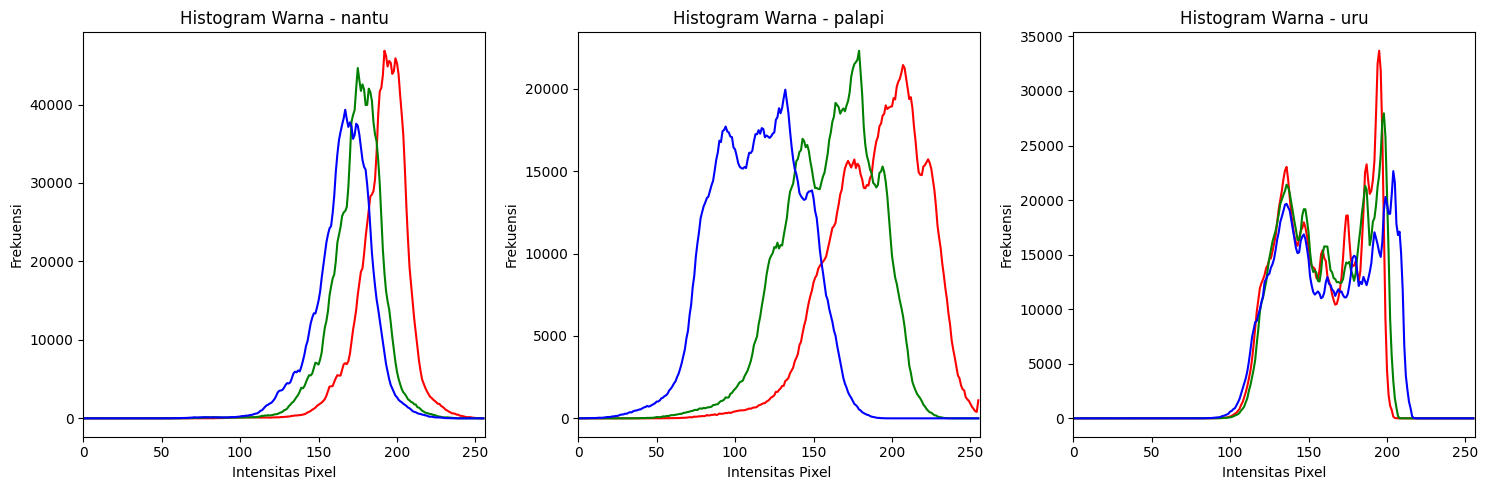

In [3]:
# ANALISIS DISTRIBUSI DATA (PIE CHART)

unique_labels, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'],
        startangle=90, shadow=True)
plt.title('Distribusi Jumlah Gambar per Kelas', pad=20)
plt.axis('equal')
plt.show()


# ANALISIS RATA-RATA WARNA (3 BERJEJER)

def display_average_colors(color_means, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    color_means = np.array(color_means)
    
    for i, class_name in enumerate(categories):
        class_color_means = color_means[labels_arr == i]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name.upper()}\nR: {avg_rgb[0]:.1f} - G: {avg_rgb[1]:.1f} - B: {avg_rgb[2]:.1f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# ANALISIS UKURAN GAMBAR

def analyze_image_sizes(images, labels_arr, categories):
    shapes = np.array([img.shape[:2] for img in images])
    
    # Info numerik
    print("\nANALISIS UKURAN GAMBAR:")
    print("=======================")
    for i, class_name in enumerate(categories):
        class_shapes = shapes[labels_arr == i]
        print(f"\n{class_name.upper()}:")
        print(f"  Resolusi rata-rata: {np.mean(class_shapes, axis=0).astype(int)} (P x L)")
        print(f"  Ukuran minimum: {np.min(class_shapes, axis=0)}")
        print(f"  Ukuran maksimum: {np.max(class_shapes, axis=0)}")

labels_arr = np.array(labels)
analyze_image_sizes(data, labels_arr, categories)

# ANALISIS KARAKTERISTIK VISUAL

def analyze_image_properties(images, labels_arr, categories):
    brightness_values = []
    contrast_values = []
    color_means = []
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        brightness_values.append(np.mean(gray))
        contrast_values.append(np.std(gray))
        color_means.append(np.mean(img, axis=(0,1)))
    
    brightness_values = np.array(brightness_values)
    contrast_values = np.array(contrast_values)
    color_means = np.array(color_means)
    
    labels_arr = np.array(labels_arr)
    
    
    # ANALISIS RATA-RATA WARNA PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        class_color_means = color_means[class_indices]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name}\nR:{avg_rgb[0]:.1f} G:{avg_rgb[1]:.1f} B:{avg_rgb[2]:.1f}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS BRIGHTNESS DAN CONTRAST
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Brightness
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax1.hist(brightness_values[class_indices], bins=20, alpha=0.7, 
                label=f'{class_name} (μ={np.mean(brightness_values[class_indices]):.1f})')
    ax1.set_title('Distribusi Brightness per Kelas')
    ax1.set_xlabel('Brightness (0-255)')
    ax1.set_ylabel('Frekuensi')
    ax1.legend()
    
    # Contrast
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax2.hist(contrast_values[class_indices], bins=20, alpha=0.7,
                label=f'{class_name} (μ={np.mean(contrast_values[class_indices]):.1f})')
    ax2.set_title('Distribusi Contrast per Kelas')
    ax2.set_xlabel('Contrast')
    ax2.set_ylabel('Frekuensi')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS NOISE PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        noise_levels = []
        
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise = cv2.Laplacian(gray, cv2.CV_64F).var()
            noise_levels.append(noise)
        
        plt.subplot(1, 3, i+1)
        plt.hist(noise_levels, bins=20, color=['red','green','blue'][i])
        plt.title(f'Noise - {class_name}')
        plt.xlabel('Tingkat Noise')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()
    
    
    # STATISTIKNYA
    
    print("\nANALISIS STATISTIK PER KELAS:")
    print("============================")
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        
        # Calculate properties
        class_brightness = brightness_values[class_indices]
        class_contrast = contrast_values[class_indices]
        class_colors = color_means[class_indices]
        
        # Calculate noise
        noise_levels = []
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise_levels.append(cv2.Laplacian(gray, cv2.CV_64F).var())
        
        print(f"\n{class_name.upper()}:")
        print(f"  Jumlah Sample: {len(class_indices)}")
        print(f"  Warna Rata-rata - R:{np.mean(class_colors[:,0]):.1f} G:{np.mean(class_colors[:,1]):.1f} B:{np.mean(class_colors[:,2]):.1f}")
        print(f"  Brightness - μ:{np.mean(class_brightness):.1f} σ:{np.std(class_brightness):.1f}")
        print(f"  Contrast - μ:{np.mean(class_contrast):.1f} σ:{np.std(class_contrast):.1f}")
        print(f"  Noise - μ:{np.mean(noise_levels):.1f} σ:{np.std(noise_levels):.1f}")

analyze_image_properties(data, labels_arr, categories)

# ANALISIS HISTOGRAM WARNA

def analyze_color_histograms(images, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    
    for i, class_name in enumerate(categories):
        class_images = [img for img, label in zip(images, labels_arr) if label == i]
        if not class_images:
            continue
        sample_img = class_images[0]
        
        plt.subplot(1, 3, i+1)
        for j, color in enumerate(['red', 'green', 'blue']):
            hist = cv2.calcHist([sample_img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        
        plt.title(f'Histogram Warna - {class_name}')
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()

analyze_color_histograms(data, labels_arr, categories)

# Percobaan 1